In [128]:
import joblib
import numpy as np

In [129]:
SMPL_LANDMARK_INDICES = {"HEAD_TOP": 412,
                    "HEAD_LEFT_TEMPLE": 166,
                    "NECK_ADAM_APPLE": 3050,
                    "LEFT_HEEL": 3458,
                    "RIGHT_HEEL": 6858,
                    "LEFT_NIPPLE": 3042,
                    "RIGHT_NIPPLE": 6489,

                    "SHOULDER_TOP": 3068,
                    "INSEAM_POINT": 3149,
                    "BELLY_BUTTON": 3501,
                    "BACK_BELLY_BUTTON": 3022,
                    "CROTCH": 1210,
                    "PUBIC_BONE": 3145,
                    "RIGHT_WRIST": 5559,
                    "LEFT_WRIST": 2241,
                    "RIGHT_BICEP": 4855,
                    "RIGHT_FOREARM": 5197,
                    "LEFT_SHOULDER": 3011,
                    "RIGHT_SHOULDER": 6470,
                    "LOW_LEFT_HIP": 3134,
                    "LEFT_THIGH": 947,
                    "LEFT_CALF": 1103,
                    "LEFT_ANKLE": 3325
                    }

SMPL_LANDMARK_INDICES["HEELS"] = (SMPL_LANDMARK_INDICES["LEFT_HEEL"], 
                                  SMPL_LANDMARK_INDICES["RIGHT_HEEL"])

In [153]:
LENGTHS = {"height": 
                    (SMPL_LANDMARK_INDICES["HEAD_TOP"], 
                     SMPL_LANDMARK_INDICES["HEELS"]
                     ),
               "shoulder to crotch height": 
                    (SMPL_LANDMARK_INDICES["SHOULDER_TOP"], 
                     SMPL_LANDMARK_INDICES["INSEAM_POINT"]
                    ),
                "arm left length": 
                    (SMPL_LANDMARK_INDICES["LEFT_SHOULDER"], 
                     SMPL_LANDMARK_INDICES["LEFT_WRIST"]
                    ),
                "arm right length":
                    (SMPL_LANDMARK_INDICES["RIGHT_SHOULDER"], 
                     SMPL_LANDMARK_INDICES["RIGHT_WRIST"]
                    ),
                "inside leg height": 
                    (SMPL_LANDMARK_INDICES["LOW_LEFT_HIP"], 
                     SMPL_LANDMARK_INDICES["LEFT_ANKLE"]
                    ),
                "shoulder breadth": 
                    (SMPL_LANDMARK_INDICES["LEFT_SHOULDER"], 
                     SMPL_LANDMARK_INDICES["RIGHT_SHOULDER"]
                    ),
               }


In [154]:
results = joblib.load("demo_out/niklas/000016_out.pkl")
verts = results["pred_vertices"]

In [155]:
verts = verts.cpu()

In [156]:
verts.shape

torch.Size([1, 6890, 3])

In [157]:
measurement_landmarks_inds

(412, (3458, 6858))

In [158]:
measurement_landmarks_inds = LENGTHS["arm left length"]

landmark_points = []
for i in range(2):
    if isinstance(measurement_landmarks_inds[i],tuple):
        # if touple of indices for landmark, take their average
        lm = (verts[0][measurement_landmarks_inds[i][0]] + 
                  verts[0][measurement_landmarks_inds[i][1]]) / 2
    else:
        lm = verts[0][measurement_landmarks_inds[i]]

    landmark_points.append(lm)

landmark_points = np.vstack(landmark_points)[None,...]

In [159]:
verts_distances = np.linalg.norm(landmark_points[:, 1] - landmark_points[:, 0],axis=1)
distance = np.sum(verts_distances)
distance_cm = distance * 100 # convert to cm

In [160]:
distance_cm

45.90449631214142

In [87]:
results = joblib.load("demo_out/gosia/gosia_out.pkl")

In [88]:
results.keys()

dict_keys(['pred_cam', 'pred_smpl_params', 'pred_cam_t', 'focal_length', 'pred_keypoints_3d', 'pred_vertices', 'pred_keypoints_2d'])

In [89]:
results["pred_vertices"].shape

torch.Size([1, 6890, 3])

In [90]:
top_head_y = results["pred_vertices"][0,412,1]
left_heal_y = results["pred_vertices"][0, 3458, 1]
right_heal_y = results["pred_vertices"][0, 6858, 1]

In [91]:
height = abs(top_head_y) + (left_heal_y + right_heal_y) / 2

In [92]:
height

tensor(1.6868, device='cuda:0')

In [102]:
top_head = results["pred_vertices"][0,412]
left_heal_= results["pred_vertices"][0, 3458]
right_heal = results["pred_vertices"][0, 6858]

In [ ]:
landmark_points = []
for i in range(2):
    if isinstance(measurement_landmarks_inds[i],tuple):
        # if touple of indices for landmark, take their average
        lm = (self.verts[measurement_landmarks_inds[i][0]] + 
                  self.verts[measurement_landmarks_inds[i][1]]) / 2
    else:
        lm = self.verts[measurement_landmarks_inds[i]]

    landmark_points.append(lm)

landmark_points = np.vstack(landmark_points)[None,...]

return self._get_dist(landmark_points)


In [96]:
verts = []
verts.append(top_head)
verts.append((left_heal + right_heal) / 2)

In [97]:
verts

[tensor([ 0.0041, -0.9953, -0.0365], device='cuda:0'),
 tensor([0.3135, 0.6914, 0.4410], device='cuda:0')]

In [98]:
verts = [[0.0041, -0.9953, -0.0365], [0.3135, 0.6914, 0.4410]]

In [99]:
verts = np.vstack(verts)[None,...]

In [100]:
verts_distances = np.linalg.norm(verts[:, 1] - verts[:, 0],axis=1)
distance = np.sum(verts_distances)
distance_cm = distance * 100 # convert to cm

In [101]:
distance_cm

178.00818801392256

In [41]:
results["pred_vertices"][0,:,0].min()

tensor(-0.2472, device='cuda:0')

In [40]:
results["pred_vertices"][0,:,2].max()

tensor(0.1929, device='cuda:0')

In [39]:
results["pred_vertices"][0,:,2].min()

tensor(-0.2389, device='cuda:0')

In [38]:
results["pred_vertices"][0,:,1].min() - results["pred_vertices"][0,:,1].max()

tensor(-1.7446, device='cuda:0')

In [4]:
results2 = joblib.load("outputs/results/demo_girl.pkl")

In [15]:
results2["outputs//_DEMO/girl/img\\000040.jpg"]["camera_bbox"]

[array([ 1.2312359 , -0.13974237,  0.21560507], dtype=float32)]

In [27]:
left_foot_x = []
left_foot_y = []

In [108]:
for frame in results.keys():
    if len(results[frame]["3d_joints"]) > 0:
        left_foot_x.append(results[frame]["3d_joints"][0][4][0])
        left_foot_y.append(results[frame]["3d_joints"][0][4][1])

In [7]:
from matplotlib import pyplot as plt

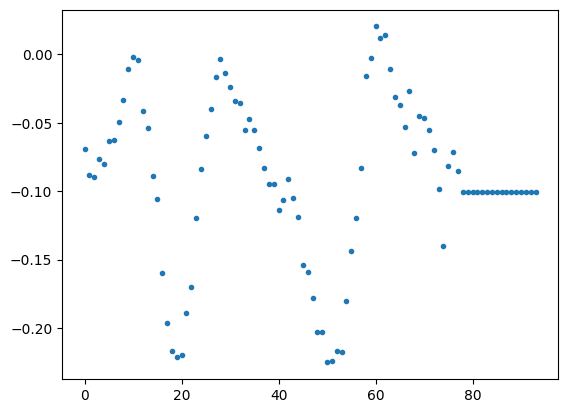

In [29]:
plt.plot(range(len(left_foot_x)), left_foot_y, ".")

In [28]:
for frame in results.keys():
    if len(results[frame]["smpl"]) > 0:
        left_foot_x.append(results[frame]["smpl"][0]['body_pose'][6][0][0])
        left_foot_y.append(results[frame]["smpl"][0]['body_pose'][6][1][0])